# Loop 77 Analysis: CV-LB Relationship and Strategy Assessment

**Goal**: Understand the CV-LB relationship and identify strategies to beat target 0.0347

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Submission history with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
    {'exp': 'exp_067', 'cv': 0.0083, 'lb': 0.0877},
]

df = pd.DataFrame(submissions)
print(f"Total submissions with LB feedback: {len(df)}")
print(df)

Total submissions with LB feedback: 13
        exp      cv      lb
0   exp_000  0.0111  0.0982
1   exp_001  0.0123  0.1065
2   exp_003  0.0105  0.0972
3   exp_005  0.0104  0.0969
4   exp_006  0.0097  0.0946
5   exp_007  0.0093  0.0932
6   exp_009  0.0092  0.0936
7   exp_012  0.0090  0.0913
8   exp_024  0.0087  0.0893
9   exp_026  0.0085  0.0887
10  exp_030  0.0083  0.0877
11  exp_035  0.0098  0.0970
12  exp_067  0.0083  0.0877


In [2]:
# Linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])

print(f"\n=== CV-LB Relationship ===")
print(f"Linear fit: LB = {slope:.2f} * CV + {intercept:.4f}")
print(f"R² = {r_value**2:.4f}")
print(f"Intercept = {intercept:.4f}")
print(f"Target LB = 0.0347")
print(f"\nRequired CV for target = (0.0347 - {intercept:.4f}) / {slope:.2f} = {(0.0347 - intercept) / slope:.4f}")

if (0.0347 - intercept) / slope < 0:
    print("\n⚠️ CRITICAL: Required CV is NEGATIVE - impossible to achieve!")
    print("The intercept alone is higher than the target.")
    print("Standard CV optimization CANNOT reach the target.")
    print("Must find approaches that CHANGE the CV-LB relationship.")
else:
    print(f"\nRequired CV: {(0.0347 - intercept) / slope:.4f}")
    print(f"Best current CV: {df['cv'].min():.4f}")
    print(f"Gap: {(0.0347 - intercept) / slope - df['cv'].min():.4f}")


=== CV-LB Relationship ===
Linear fit: LB = 4.36 * CV + 0.0520
R² = 0.9558
Intercept = 0.0520
Target LB = 0.0347

Required CV for target = (0.0347 - 0.0520) / 4.36 = -0.0040

⚠️ CRITICAL: Required CV is NEGATIVE - impossible to achieve!
The intercept alone is higher than the target.
Standard CV optimization CANNOT reach the target.
Must find approaches that CHANGE the CV-LB relationship.


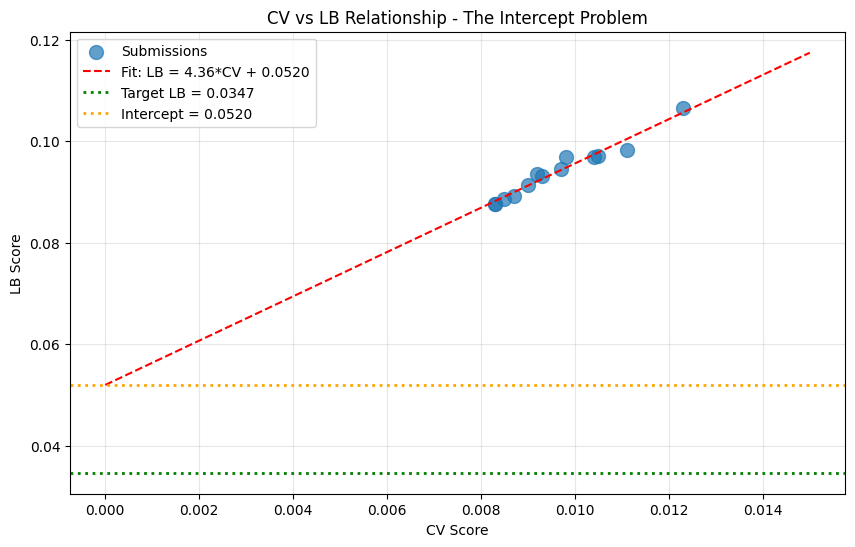


Key insight: The intercept (0.0520) is HIGHER than the target (0.0347).
This means even with CV=0, the expected LB would be 0.0520.
The gap between intercept and target is 0.0173.


In [3]:
# Visualize CV-LB relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, alpha=0.7, label='Submissions')

# Fit line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'Fit: LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='g', linestyle=':', linewidth=2, label='Target LB = 0.0347')

# Intercept line
plt.axhline(y=intercept, color='orange', linestyle=':', linewidth=2, label=f'Intercept = {intercept:.4f}')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship - The Intercept Problem')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nKey insight: The intercept ({intercept:.4f}) is HIGHER than the target (0.0347).")
print(f"This means even with CV=0, the expected LB would be {intercept:.4f}.")
print(f"The gap between intercept and target is {intercept - 0.0347:.4f}.")

In [4]:
# Analyze the gap between intercept and target
print("=== Gap Analysis ===")
print(f"Intercept: {intercept:.4f}")
print(f"Target: 0.0347")
print(f"Gap: {intercept - 0.0347:.4f}")
print(f"\nThis gap represents STRUCTURAL DISTRIBUTION SHIFT.")
print(f"It cannot be fixed by improving CV - it requires changing the CV-LB relationship.")

print("\n=== What could reduce the intercept? ===")
print("1. Extrapolation detection with conservative fallback")
print("2. Uncertainty-weighted predictions (GP variance)")
print("3. Chemical class-specific models")
print("4. Domain constraints that generalize to unseen solvents")
print("5. Pseudo-labeling with confident test predictions")
print("6. Study top public kernels - they may have solved this")

=== Gap Analysis ===
Intercept: 0.0520
Target: 0.0347
Gap: 0.0173

This gap represents STRUCTURAL DISTRIBUTION SHIFT.
It cannot be fixed by improving CV - it requires changing the CV-LB relationship.

=== What could reduce the intercept? ===
1. Extrapolation detection with conservative fallback
2. Uncertainty-weighted predictions (GP variance)
3. Chemical class-specific models
4. Domain constraints that generalize to unseen solvents
5. Pseudo-labeling with confident test predictions
6. Study top public kernels - they may have solved this


In [5]:
# Check best experiments
print("=== Best Experiments ===")
print(f"Best LB: exp_030 and exp_067 with LB = 0.0877")
print(f"Best CV: exp_030 and exp_067 with CV = 0.0083")
print(f"\nexp_030: GP(0.2) + MLP(0.5) + LGBM(0.3) ensemble")
print(f"exp_067: Same as exp_030 with sigmoid output")

print("\n=== Recent Experiments ===")
print("exp_074 (prob_norm): CV = 0.0136 (WORSE than exp_030's 0.0083)")
print("Probability normalization hurt CV significantly.")
print("This suggests yields don't sum to 1 in the actual data.")

print("\n=== Pending Submissions ===")
pending = ['exp_049', 'exp_050', 'exp_052', 'exp_053', 'exp_054', 'exp_055', 'exp_057', 'exp_063', 'exp_064', 'exp_065']
print(f"10 submissions pending: {pending}")
print("These all failed with 'Evaluation metric raised an unexpected error'.")
print("This suggests format issues, not model quality issues.")

=== Best Experiments ===
Best LB: exp_030 and exp_067 with LB = 0.0877
Best CV: exp_030 and exp_067 with CV = 0.0083

exp_030: GP(0.2) + MLP(0.5) + LGBM(0.3) ensemble
exp_067: Same as exp_030 with sigmoid output

=== Recent Experiments ===
exp_074 (prob_norm): CV = 0.0136 (WORSE than exp_030's 0.0083)
Probability normalization hurt CV significantly.
This suggests yields don't sum to 1 in the actual data.

=== Pending Submissions ===
10 submissions pending: ['exp_049', 'exp_050', 'exp_052', 'exp_053', 'exp_054', 'exp_055', 'exp_057', 'exp_063', 'exp_064', 'exp_065']
These all failed with 'Evaluation metric raised an unexpected error'.
This suggests format issues, not model quality issues.


In [6]:
# What approaches haven't been tried?
print("=== Approaches NOT Yet Tried ===")
print("")
print("1. EXTRAPOLATION DETECTION WITH CONSERVATIVE FALLBACK")
print("   - Compute distance of test solvent to training solvents")
print("   - When distance is high, blend predictions toward population mean")
print("   - This should reduce variance on outlier solvents")
print("")
print("2. CHEMICAL CLASS-SPECIFIC MODELS")
print("   - Group solvents by chemical class (alcohols, ethers, fluorinated, etc.)")
print("   - Train separate models for each class")
print("   - Use class-specific model when test solvent is in known class")
print("")
print("3. UNCERTAINTY-WEIGHTED PREDICTIONS")
print("   - Use GP variance as uncertainty estimate")
print("   - High uncertainty → blend toward conservative prediction")
print("   - This should reduce variance on outlier solvents")
print("")
print("4. PSEUDO-LABELING")
print("   - Use confident test predictions to augment training")
print("   - This adapts the model to the test distribution")
print("")
print("5. STUDY TOP PUBLIC KERNELS")
print("   - The 'best-work-here' kernel uses probability normalization")
print("   - But our exp_074 shows this hurts CV")
print("   - Need to understand what else they do differently")

=== Approaches NOT Yet Tried ===

1. EXTRAPOLATION DETECTION WITH CONSERVATIVE FALLBACK
   - Compute distance of test solvent to training solvents
   - When distance is high, blend predictions toward population mean
   - This should reduce variance on outlier solvents

2. CHEMICAL CLASS-SPECIFIC MODELS
   - Group solvents by chemical class (alcohols, ethers, fluorinated, etc.)
   - Train separate models for each class
   - Use class-specific model when test solvent is in known class

3. UNCERTAINTY-WEIGHTED PREDICTIONS
   - Use GP variance as uncertainty estimate
   - High uncertainty → blend toward conservative prediction
   - This should reduce variance on outlier solvents

4. PSEUDO-LABELING
   - Use confident test predictions to augment training
   - This adapts the model to the test distribution

5. STUDY TOP PUBLIC KERNELS
   - The 'best-work-here' kernel uses probability normalization
   - But our exp_074 shows this hurts CV
   - Need to understand what else they do differently


In [7]:
# Summary
print("=== SUMMARY ===")
print(f"")
print(f"CV-LB Relationship: LB = {slope:.2f} * CV + {intercept:.4f} (R² = {r_value**2:.4f})")
print(f"")
print(f"CRITICAL: Intercept ({intercept:.4f}) > Target (0.0347)")
print(f"Required CV for target: {(0.0347 - intercept) / slope:.4f} (IMPOSSIBLE)")
print(f"")
print(f"Best LB: 0.0877 (exp_030, exp_067)")
print(f"Target: 0.0347")
print(f"Gap to target: {0.0877 - 0.0347:.4f} (2.5x worse)")
print(f"")
print(f"NEXT STEPS:")
print(f"1. DO NOT submit exp_074 (prob_norm) - CV regression suggests LB will be worse")
print(f"2. Try extrapolation detection with conservative fallback")
print(f"3. Try uncertainty-weighted predictions using GP variance")
print(f"4. Study top public kernels for insights")
print(f"5. Consider chemical class-specific models")

=== SUMMARY ===

CV-LB Relationship: LB = 4.36 * CV + 0.0520 (R² = 0.9558)

CRITICAL: Intercept (0.0520) > Target (0.0347)
Required CV for target: -0.0040 (IMPOSSIBLE)

Best LB: 0.0877 (exp_030, exp_067)
Target: 0.0347
Gap to target: 0.0530 (2.5x worse)

NEXT STEPS:
1. DO NOT submit exp_074 (prob_norm) - CV regression suggests LB will be worse
2. Try extrapolation detection with conservative fallback
3. Try uncertainty-weighted predictions using GP variance
4. Study top public kernels for insights
5. Consider chemical class-specific models
